# Introduction
<hr style="border:2px solid black"> </hr>


**What?** Sonar mines vs. rock dataset



# Goal
<hr style = "border:2px solid black" ></hr>


- The problem is to predict metal or rock objects from sonar return data.
- Each pattern is a set of 60 numbers in the range 0.0 to 1.0. Each number represents the energy within a particular frequency band, integrated over a certain period of time. 
- The label associated with each record contains  the letter -->>R<<-- if the object is a rock and -->>M<<-- if it is a mine
(metal cylinder).
- The numbers in the labels are in increasing order of  aspect angle, but they do not encode the angle directly.



# Import modules
<hr style = "border:2px solid black" ></hr>

In [23]:
import numpy
from pandas import read_csv
from pylab import rcParams
from matplotlib import pyplot
from pandas import set_option
from sklearn.model_selection import KFold
from pandas.plotting import scatter_matrix
from IPython.display import Markdown, display
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

# Load the dataset
<hr style = "border:2px solid black" ></hr>

In [9]:
dataset = read_csv('./datasetCollections/sonar.all-data.csv', header=None)

<span style='color:blue'>**Load dataset**</span>

In [17]:
print(dataset.shape)

<span style='color:blue'>**Screening of the daa**</span>

(208, 61)


In [18]:
# head
set_option('display.width', 100)
dataset.head(3)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R


In [20]:
# descriptions, change precision to 3 places
set_option('precision', 3) 
dataset.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000,2.080e+02,208.000,208.000,208.000,208.000,208.000,208.000,208.000,208.000,...,208.000,2.080e+02,2.080e+02,208.000,2.080e+02,2.080e+02,2.080e+02,2.080e+02,2.080e+02,2.080e+02
mean,0.029,3.844e-02,0.044,0.054,0.075,0.105,0.122,0.135,0.178,0.208,...,0.016,1.342e-02,1.071e-02,0.011,9.290e-03,8.222e-03,7.820e-03,7.949e-03,7.941e-03,6.507e-03
std,0.023,3.296e-02,0.038,0.047,0.056,0.059,0.062,0.085,0.118,0.134,...,0.012,9.634e-03,7.060e-03,0.007,7.088e-03,5.736e-03,5.785e-03,6.470e-03,6.181e-03,5.031e-03
min,0.002,6.000e-04,0.002,0.006,0.007,0.010,0.003,0.005,0.007,0.011,...,0.000,8.000e-04,5.000e-04,0.001,6.000e-04,4.000e-04,3.000e-04,3.000e-04,1.000e-04,6.000e-04
25%,0.013,1.645e-02,0.019,0.024,0.038,0.067,0.081,0.080,0.097,0.111,...,0.008,7.275e-03,5.075e-03,0.005,4.150e-03,4.400e-03,3.700e-03,3.600e-03,3.675e-03,3.100e-03
50%,0.023,3.080e-02,0.034,0.044,0.062,0.092,0.107,0.112,0.152,0.182,...,0.014,1.140e-02,9.550e-03,0.009,7.500e-03,6.850e-03,5.950e-03,5.800e-03,6.400e-03,5.300e-03
75%,0.036,4.795e-02,0.058,0.065,0.100,0.134,0.154,0.170,0.233,0.269,...,0.021,1.673e-02,1.490e-02,0.015,1.210e-02,1.058e-02,1.043e-02,1.035e-02,1.033e-02,8.525e-03
max,0.137,2.339e-01,0.306,0.426,0.401,0.382,0.373,0.459,0.683,0.711,...,0.100,7.090e-02,3.900e-02,0.035,4.470e-02,3.940e-02,3.550e-02,4.400e-02,3.640e-02,4.390e-02


# EDA
<hr style = "border:2px solid black" ></hr>

In [21]:
# class distribution
print(dataset.groupby(60).size())

60
M    111
R     97
dtype: int64


<span style='color:blue'>**Data visualisation**</span>

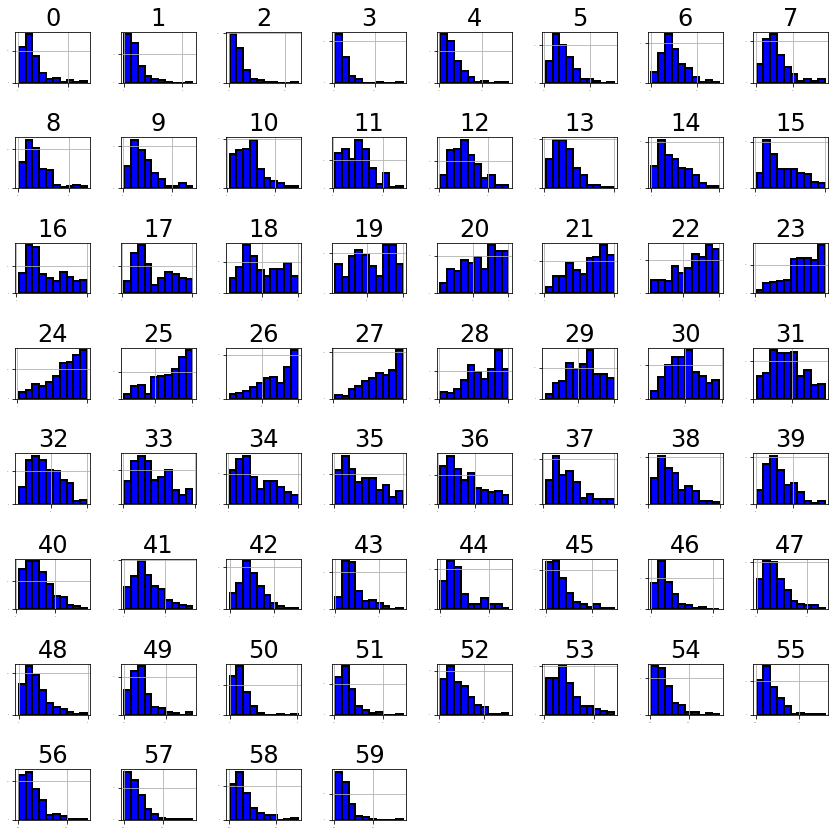

In [25]:
myPrint("Data visualisation")
# histograms
rcParams['figure.figsize'] = 12, 12
rcParams['font.size'] = 20
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, color = 'blue', edgecolor = 'black', lw = 2)
pyplot.tight_layout()
pyplot.grid(True)
pyplot.show()

"""
We can see that there are a lot of Gaussian-like distributions and perhaps 
some exponential- like distributions for other attributes.
"""

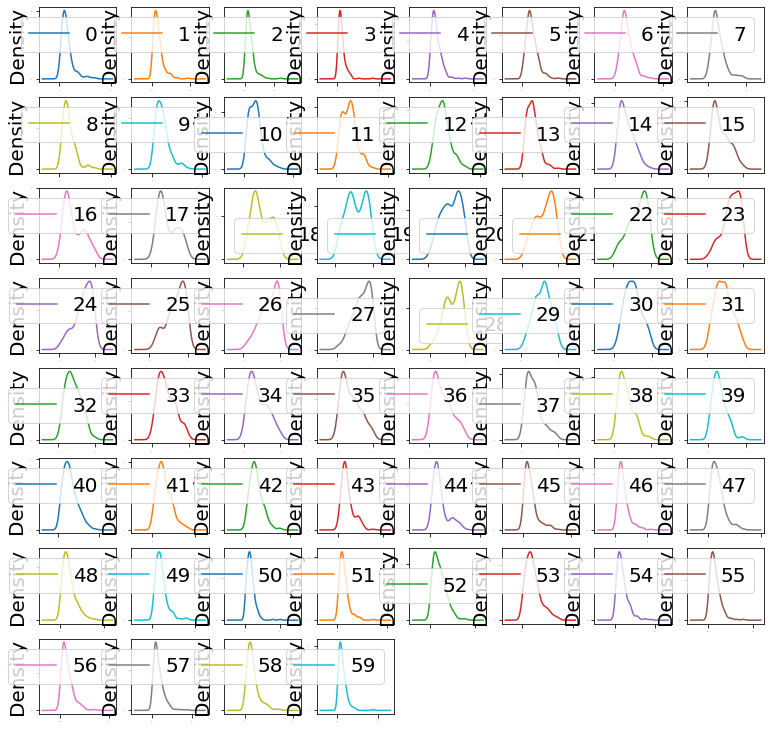

In [28]:
# Density plot
rcParams['figure.figsize'] = 13, 13
rcParams['font.size'] = 20
dataset.plot(kind='density', subplots=True, layout=(8,8), sharex=False, legend=True, fontsize=1)
pyplot.show()

"""
This is useful, you can see that many of the attributes have a skewed distribution. 
A power transform like a Box-Cox transform that can correct for the skew in 
distributions might be useful.
"""

IndexError: index 0 is out of bounds for axis 0 with size 0

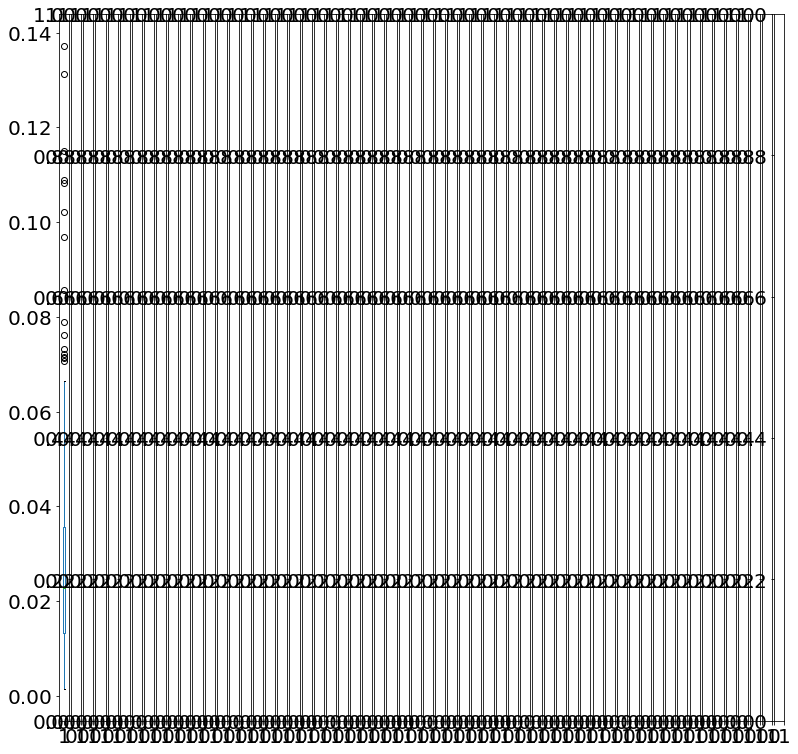

In [33]:
"""
It is always good to look at box and whisker plots of numeric attributes to
get an idea of the spread of values.
"""

# box and whisker plots
rcParams['figure.figsize'] = 13, 13
rcParams['font.size'] = 20
dataset.plot(kind='box', subplots = True)
pyplot.show()

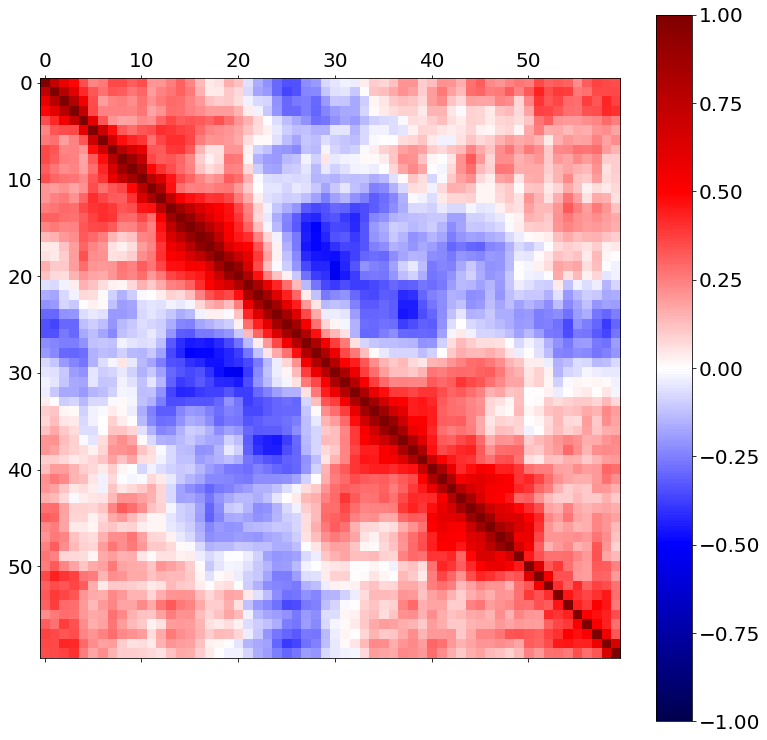

In [38]:
# correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation = 'none', cmap='seismic')
fig.colorbar(cax)
pyplot.show()

"""

It looks like there is also some structure in the order of the attributes.
The red around the diagonal suggests that attributes that are next to each
other are generally more correlated with each other. The blue patches also 
suggest some moderate negative correlation the further attributes are away 
from each other in the ordering. This makes sense if the order of the 
attributes refers to the angle of sensors for the sonar chirp
"""

# Split the data
<hr style = "border:2px solid black" ></hr>

In [41]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:60].astype(float)
Y = array[:,60]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)
print("X original, ", X.shape)
print("X validation, ", X_validation.shape)
print("X train, ", X_train.shape)

<span style='color:blue'>**splitting the data**</span>

X original,  (208, 60)
X validation,  (42, 60)
X train,  (166, 60)


# Modelling
<hr style = "border:2px solid black" ></hr>

In [44]:
"""
The six algorithms selected include (default options are used):

Linear Algorithms
-----------------
Logistic Regression (LR) 
Linear Discriminant Analysis (LDA) 

Nonlinear Algorithms
--------------------
Classification and Regression Trees (CART)
Support Vector Machines (SVM)
Gaussian Naive Bayes (NB)
k-Nearest Neighbors (KNN)
"""

models = []
models.append(('LR', LogisticRegression())) 
models.append(('LDA', LinearDiscriminantAnalysis())) 
models.append(('KNN', KNeighborsClassifier())) 
models.append(('CART', DecisionTreeClassifier())) 
models.append(('NB', GaussianNB())) 
models.append(('SVM', SVC()))

# Remember this is done on spot-check basis so we use only default option
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits = 10, shuffle = True, random_state = 7)
    cv_results = cross_val_score(model, X_train, Y_train, cv = kfold, scoring = "accuracy")
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

<span style='color:blue'>**Evaluating different methods on a spot-check basis**</span>

LR: 0.777574 (0.088423)
LDA: 0.778676 (0.093570)
KNN: 0.758824 (0.106417)
CART: 0.793382 (0.090576)
NB: 0.682721 (0.136040)
SVM: 0.765074 (0.087519)


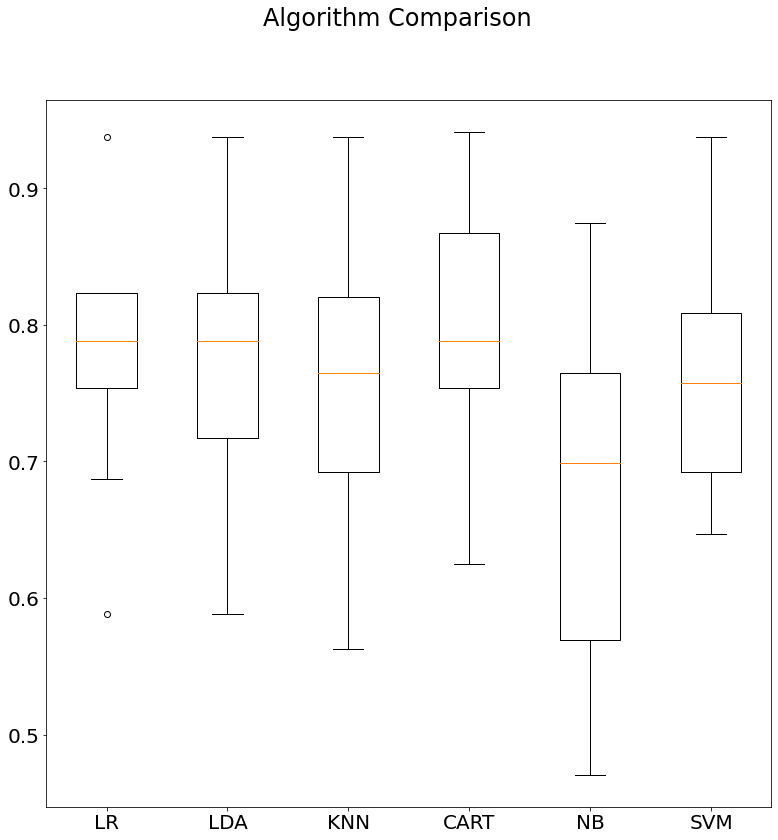

In [46]:
"""
These are just mean accuracy values. It is always wise to look at the 
distribution of accuracy values calculated across cross validation folds.
We can do that graphically using box and whisker plots.
"""

# Compare Algorithms
fig = pyplot.figure() 
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111) 
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# Modelling with standardisation
<hr style = "border:2px solid black" ></hr>

In [48]:
"""
It is possible that the varied distribution of the attributes is 
having an effect on the accuracy of algorithm. A solution would be
to standardise the data.
"""

pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits = 10, shuffle = True, random_state = 7)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring = "accuracy")
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

<span style='color:blue'>**Standardise data**</span>

ScaledLR: 0.754412 (0.067926)
ScaledLDA: 0.778676 (0.093570)
ScaledKNN: 0.808456 (0.107996)
ScaledCART: 0.752206 (0.088498)
ScaledNB: 0.682721 (0.136040)
ScaledSVM: 0.826103 (0.081814)


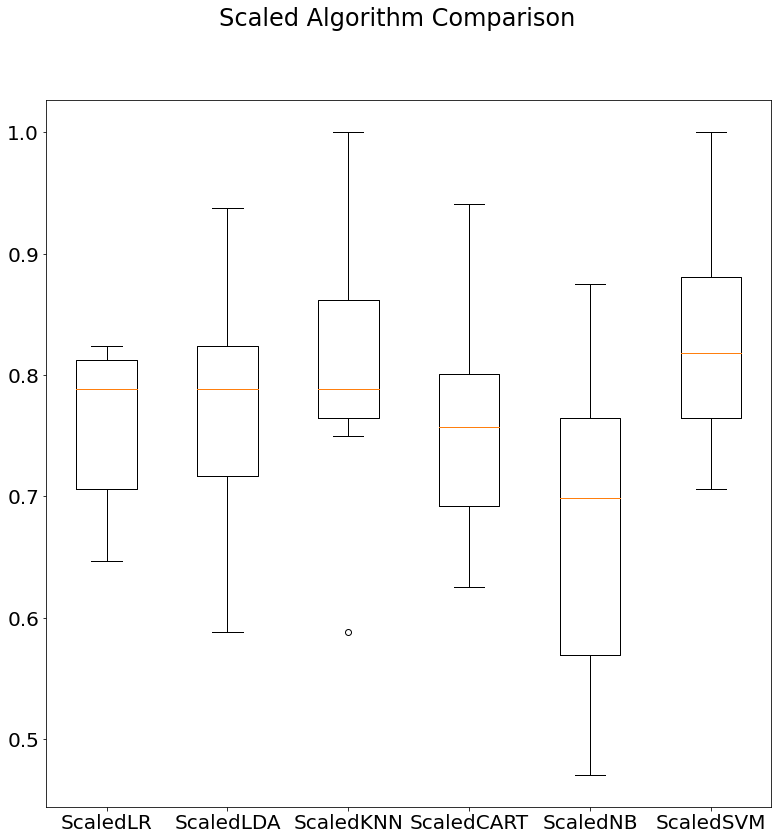

In [49]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison') 
ax = fig.add_subplot(111) 
pyplot.boxplot(results) 
ax.set_xticklabels(names)
pyplot.show()

"""
The results suggest digging deeper into the SVM and KNN algorithms. 
It is very likely that configuration beyond the default may yield 
even more accurate models.
"""

# Hyperparameters tuning
<hr style = "border:2px solid black" ></hr>

In [58]:
myPrint("Algorithm tuning for KNN via GRID SEARCH")

# Tune scaled KNN
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = KFold(n_splits = 10, shuffle = True, random_state = 7)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring = "accuracy", cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score'] 
stds = grid_result.cv_results_['std_test_score'] 
params = grid_result.cv_results_['params']

print("")
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

<span style='color:blue'>**Algorithm tuning for KNN via GRID SEARCH**</span>

Best: 0.836029 using {'n_neighbors': 1}

0.836029 (0.079487) with: {'n_neighbors': 1}
0.813603 (0.088021) with: {'n_neighbors': 3}
0.814338 (0.096870) with: {'n_neighbors': 5}
0.777574 (0.120387) with: {'n_neighbors': 7}
0.730147 (0.099376) with: {'n_neighbors': 9}
0.741544 (0.073970) with: {'n_neighbors': 11}
0.710662 (0.105829) with: {'n_neighbors': 13}
0.723162 (0.080983) with: {'n_neighbors': 15}
0.698897 (0.072669) with: {'n_neighbors': 17}
0.710662 (0.091337) with: {'n_neighbors': 19}
0.698897 (0.091195) with: {'n_neighbors': 21}


In [59]:
myPrint("Algorithm tuning for SVM via GRIDSEARCH")

# Tune scaled SVM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits = 10, shuffle = True, random_state = 7)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring = "accuracy", cv=kfold) 
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

print("")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

<span style='color:blue'>**Algorithm tuning for SVM via GRIDSEARCH**</span>

Best: 0.850000 using {'C': 1.7, 'kernel': 'rbf'}

0.748529 (0.069953) with: {'C': 0.1, 'kernel': 'linear'}
0.582721 (0.127062) with: {'C': 0.1, 'kernel': 'poly'}
0.601103 (0.184435) with: {'C': 0.1, 'kernel': 'rbf'}
0.712868 (0.116579) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.754412 (0.082337) with: {'C': 0.3, 'kernel': 'linear'}
0.644118 (0.099873) with: {'C': 0.3, 'kernel': 'poly'}
0.742279 (0.081853) with: {'C': 0.3, 'kernel': 'rbf'}
0.748529 (0.069953) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.765809 (0.070336) with: {'C': 0.5, 'kernel': 'linear'}
0.704779 (0.098225) with: {'C': 0.5, 'kernel': 'poly'}
0.784559 (0.068922) with: {'C': 0.5, 'kernel': 'rbf'}
0.760662 (0.065632) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.759926 (0.083206) with: {'C': 0.7, 'kernel': 'linear'}
0.759559 (0.093807) with: {'C': 0.7, 'kernel': 'poly'}
0.814338 (0.059832) with: {'C': 0.7, 'kernel': 'rbf'}
0.761029 (0.079602) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.765441 (0.066964) with: {'C': 0.9, 'kernel': 'linear

In [63]:
myPrint("Algortihm tuning via ENSEMBLE METHODS")

"""
Boosting Methods: AdaBoost (AB) and Gradient Boosting (GBM) 
Bagging Methods: Random Forests (RF) and Extra Trees (ET)

NOTE 
No data standardization is used in this case because all four ensemble algorithms
are based on decision trees that are LESS SENSITIVE to data distributions.
"""

ensembles = []
ensembles.append(('AB', AdaBoostClassifier())) 
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier())) 
ensembles.append(('ET', ExtraTreesClassifier())) 

results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits = 10, shuffle = True, random_state = 7)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring = "accuracy")
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


<span style='color:blue'>**Algortihm tuning via ENSEMBLE METHODS**</span>

AB: 0.782721 (0.072445)
GBM: 0.808088 (0.130779)
RF: 0.808456 (0.116834)
ET: 0.850368 (0.070163)


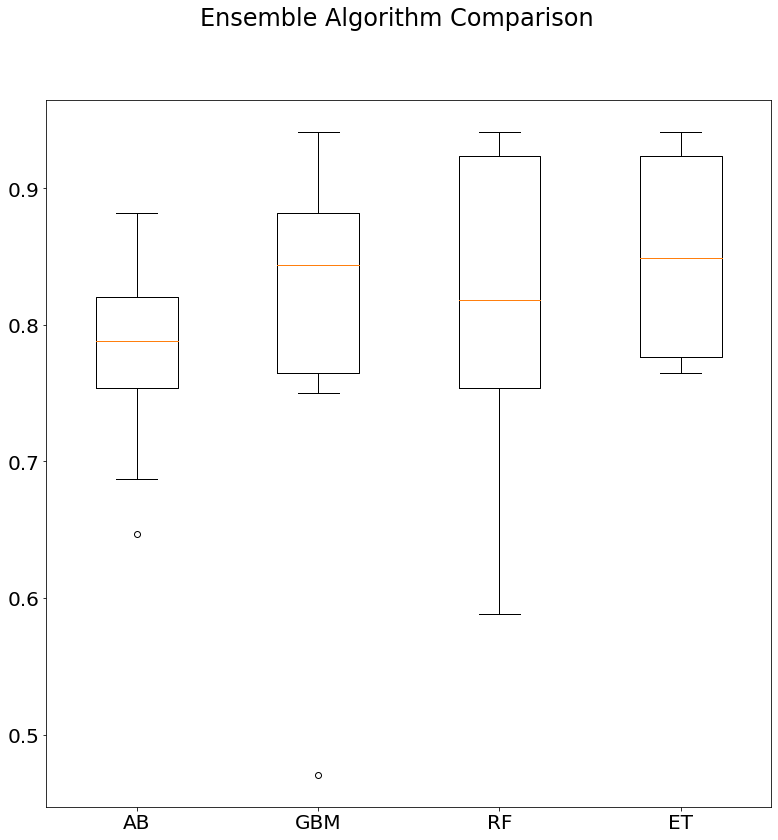

In [64]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Ensemble Algorithm Comparison') 
ax = fig.add_subplot(111) 
pyplot.boxplot(results) 
ax.set_xticklabels(names)
pyplot.show()

# Model finalisation
<hr style = "border:2px solid black" ></hr>

In [66]:
"""
The SVM showed the most promise as a low complexity and stable model for this problem.
A part of the findings was that SVM performs better when the dataset is standardized 
so that all attributes have a mean value of zero and a standard deviation of one. 
"""

# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVC(C=1.5)
model.fit(rescaledX, Y_train)
# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)

print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

"""
We can see that we achieve an accuracy of nearly 86% on the held-out validation dataset.
A score that matches closely to our expectations estimated above during the tuning of SVM.
"""

<span style='color:blue'>**Finalise the model**</span>

0.8571428571428571
[[23  4]
 [ 2 13]]
              precision    recall  f1-score   support

           M       0.92      0.85      0.88        27
           R       0.76      0.87      0.81        15

    accuracy                           0.86        42
   macro avg       0.84      0.86      0.85        42
weighted avg       0.86      0.86      0.86        42



# References
<hr style = "border:2px solid black" ></hr>


- http://archive.ics.uci.edu/ml/datasets/connectionist+bench+(sonar,+mines+vs.+rocks)

